In [6]:
import numpy as np
import sympy as sp
import math
import cmath
import matplotlib.pyplot as plt

x, y, t = sp.symbols('x y t')

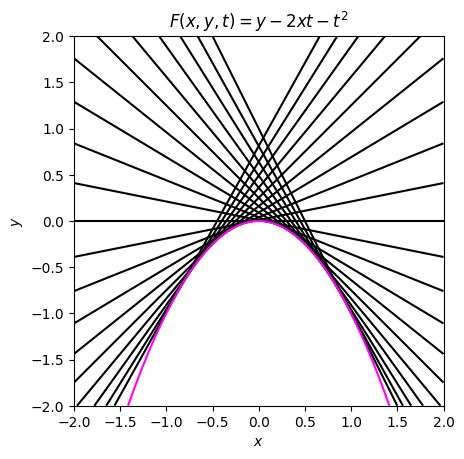

In [7]:
axlim = 2
x_vals = np.linspace(-axlim, axlim, 200)
X, Y = np.meshgrid(x_vals, x_vals)

for t_vals in np.arange(-1,1,0.1):
    Fxy =  Y - 2*X*t_vals - t_vals**2
    plt.contour(X, Y, Fxy, levels=[0], colors='black')

Exy = Y + X**2
plt.contour(X, Y, Exy, levels=[0], colors='magenta')
plt.gca().set_aspect('equal')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$F(x, y, t) = y - 2xt - t^2$')
plt.show()

In [8]:
def euler_method(function, x_start, y_start, t_min, t_max):
    list_x = [x_start]
    list_y = [y_start]
    list_parameter = [t_min]
    h = 0.05
    eps = 0.0001
    parameter = t_min
    plt.plot(x_start, y_start, 'r.')
    num_of_noreal = 0
    num_of_attention = 0
    num_of_iteration = 0

    while parameter <= t_max:
        num_of_iteration += 1       
        # Calculate the gradient
        gradient_x = sp.diff(function, x).subs({x: x_start, y: y_start, t: parameter})
        gradient_y = sp.diff(function, y).subs({x: x_start, y: y_start, t: parameter})

        move_x = gradient_x/math.sqrt(gradient_x**2+gradient_y**2)
        move_y = gradient_y/math.sqrt(gradient_x**2+gradient_y**2)

        if (abs(move_x) < eps and abs(move_y) < eps):
            print('Attention!')
            num_of_attention +=1
        
        #print(f"Gradient at {x_start}, {y_start} and t={parameter}: ({gradient_x},{gradient_y})")
        #print(f"After scaling: ({move_x},{move_y})") 

        x_new = x_start + h * (-move_y)
        y_new = y_start + h * move_x
        #print(f"New point: ({x_new}, {y_new})")
        list_x.append(x_new)
        list_y.append(y_new)
        
        x_start = x_new
        y_start = y_new
        plt.plot(x_new, y_new, 'b.')

        # Solving equation for parameter t
        a = -1
        b = -2*x_new
        c = y_new
        D = b**2 - (4*a*c)
        roots = []

        if (D >= 0):
            sol1 = (-b-cmath.sqrt(D))/(2*a)
            if t_min <= sol1 <= t_max: 
                 roots.append(sol1)
            sol2 = (-b+cmath.sqrt(D))/(2*a)
            if t_min <= sol2 <= t_max: 
                 roots.append(sol2)
            print(f"Algorithm has chosen {sol1} as a root")
            parameter = sol1
        else:
            print("No real solution")
            parameter += 0.001
            num_of_noreal += 1
    print('Počet nulových gradientov: ' + str(num_of_attention))
    print('Počet komplexných koreňov: ' + str(num_of_noreal))
    print('Počet iterácií: ' + str(num_of_iteration))
     

Starting point is (1,-1) and t=-1
Algorithm has chosen -0.955278640450005 as a root
Algorithm has chosen -0.953627252892771 as a root
Algorithm has chosen -0.908842893958390 as a root
Algorithm has chosen -0.905425282035867 as a root
Algorithm has chosen -0.860501437118771 as a root
Algorithm has chosen -0.855185130955668 as a root
Algorithm has chosen -0.810028346601903 as a root
Algorithm has chosen -0.802659541591314 as a root
Algorithm has chosen -0.757154910671102 as a root
Algorithm has chosen -0.747553998986782 as a root
Algorithm has chosen -0.701559428074462 as a root
Algorithm has chosen -0.689515825905857 as a root
Algorithm has chosen -0.642854896422347 as a root
Algorithm has chosen -0.628121630880022 as a root
Algorithm has chosen -0.580575248218382 as a root
Algorithm has chosen -0.562864805689640 as a root
Algorithm has chosen -0.514162928283178 as a root
Algorithm has chosen -0.493148410054898 as a root
Algorithm has chosen -0.442966121489505 as a root
Algorithm has ch

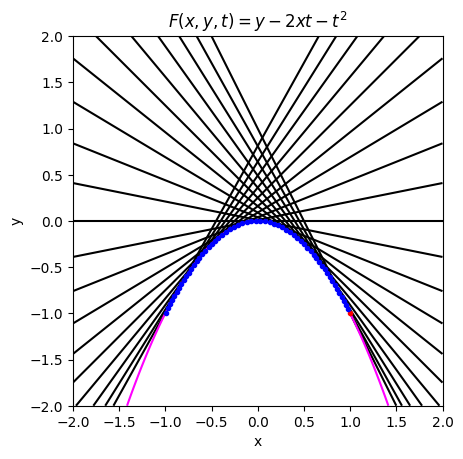

In [10]:
family_of_curves = y - 2*x*t - t**2
t_min = -1
t_max = 1
x_start = 1
y_start = -1
print(f"Starting point is ({x_start},{y_start}) and t={t_min}")

plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal')
plt.title(r'$F(x, y, t) = y - 2xt - t^2$')

X, Y = np.meshgrid(x_vals, x_vals)
for t_vals in np.arange(-1,1,0.1):
    Fxy =  Y - 2*X*t_vals - t_vals**2
    plt.contour(X, Y, Fxy, levels=[0], colors='black')

Exy = Y + X**2
plt.contour(X, Y, Exy, levels=[0], colors='magenta')

euler_method(family_of_curves, x_start, y_start, t_min, t_max)

plt.show()